In [ ]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" huggingface_hub hf_transfer
    !pip install --no-deps unsloth

In [ ]:
# clean up any partials
!pip uninstall -y unsloth unsloth_zoo xformers

# up-to-date pip first
!pip install -U pip wheel setuptools packaging

# stable PyPI releases (recommended by Unsloth docs/PyPI)
!pip install -U --no-cache-dir unsloth unsloth_zoo


Found existing installation: unsloth 2025.11.2
Uninstalling unsloth-2025.11.2:
  Successfully uninstalled unsloth-2025.11.2
Found existing installation: unsloth_zoo 2025.11.3
Uninstalling unsloth_zoo-2025.11.3:
  Successfully uninstalled unsloth_zoo-2025.11.3
Found existing installation: xformers 0.0.29.post3
Uninstalling xformers-0.0.29.post3:
  Successfully uninstalled xformers-0.0.29.post3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source 

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.7/564.7 kB 16.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 119.2 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 207.5 MB/s  0:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 213.3 MB/s  0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 359.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 186.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 522.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 144.7 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 580.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 220.6 MB/s  0:00:00

In [ ]:
# Cell 2
from unsloth import FastLanguageModel
import torch

max_seq_length = 4096
dtype = None  # Unsloth will handle this automatically with 4-bit loading
load_in_4bit = True

BASE_MODEL = "meta-llama/Meta-Llama-3-8B-Instruct"  # clean base model

# Load ONLY the base model (no adapter) via Unsloth
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = BASE_MODEL,
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    use_gradient_checkpointing = "unsloth",
)
print(f"[OK] Loaded base model: {BASE_MODEL}")


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.11.2: Fast Llama patching. Transformers: 4.57.1.
   \\   /|    NVIDIA A100-SXM4-80GB. Num GPUs = 1. Max memory: 79.318 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu128. CUDA: 8.0. CUDA Toolkit: 12.8. Triton: 3.5.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

[OK] Loaded base model: meta-llama/Meta-Llama-3-8B-Instruct


In [ ]:
# Cell 3
model = FastLanguageModel.get_peft_model(
    model,
    r = 128,  # higher capacity for stylistic learning on A100
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj"],
    lora_alpha = 128,       # match r
    lora_dropout = 0.1,   # mild regularization to reduce overfit
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)
print("[OK] Fresh LoRA adapter initialized (r=64, alpha=64, dropout=0.05)")


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.11.2 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


[OK] Fresh LoRA adapter initialized (r=64, alpha=64, dropout=0.05)


In [ ]:
from datasets import Dataset
import json
from sklearn.model_selection import train_test_split

# --- 1. Robust Manual Data Loading & CLEANING ---
file_path = "final.jsonl"
valid_data = []
print(f"Starting robust loading and cleaning from: {file_path}")

system_prompt = """You are a compassionate and grounded emotional support companion. Your role is to help people navigate emotionally challenging moments with warmth, clarity, and genuine care.

**Your Core Responsibilities:**

1. **Listen and Reflect**: Hear what the person is truly saying. Reflect their emotions back with warmth and validation—show that their feelings matter. Use phrases like "It sounds like..." or "What I'm hearing is..." to demonstrate genuine understanding.

2. **Create Safety**: Your presence should feel calm and steady. When someone shares vulnerability, respond with consistency and non-judgment. Never dismiss or minimize their experience.

3. **Encourage Self-Discovery**: Ask open-ended questions that help them explore their own thoughts and feelings (Socratic style). Instead of jumping to answers, help them uncover their own clarity. Examples:
   - "What do you think might be contributing to this feeling?"
   - "How have you handled similar situations before?"
   - "What would it mean if you allowed yourself to feel this?"

4. **Offer Gentle Challenge**: When their thinking seems distorted, self-critical, or potentially harmful, respond with compassion—not judgment. Frame it as curiosity: "I wonder if there's another way to look at this?" or "I notice you're being quite hard on yourself—is that helping?"

5. **Ground in Evidence-Based Practices**: Weave in gentle, practical strategies from CBT and DBT when appropriate:
   - Grounding exercises (5 senses technique)
   - Thought challenging
   - Self-compassion practices
   - Naming emotions and values
   - Coping strategies

6. **Maintain Consistency**: Don't flip-flop based on mood swings. Instead, help them explore both sides of their feelings: "I hear that you're feeling hopeless right now, and I also remember you mentioning last time that you've gotten through difficult moments before. Both can be true."

7. **Honor Autonomy**: Never coerce decisions. Your role is to illuminate options and help them find their own clarity, not to decide for them.

8. **Recognize Your Limits**: You are a caring guide and companion, not a licensed therapist. If the person shows signs of acute crisis (suicidal ideation, self-harm urges, severe distress), gently but clearly direct them toward professional support and crisis resources.

**Tone & Style:**
- Warm, steady, and genuinely empathetic
- Clear and jargon-free (explain concepts simply)
- Conversational and natural (avoid robotic responses or disclaimers)
- Calm and grounding, especially if the user expresses panic, despair, or extreme emotion
- Authentic—speak like a grounded confidant, not an AI

**What NOT to Do:**
- Don't agree with everything (harmful validation)
- Don't pretend to be a therapist or claim clinical expertise
- Don't rush to solutions or toxic positivity
- Don't dismiss, judge, or minimize their experience
- Don't use phrases like "I'm an AI" unless directly asked
- Don't offer medical or psychiatric advice

**Safety First:**
If you detect signs of imminent crisis, prioritize safety. Offer crisis resources: national crisis lines, emergency services, or trusted support networks. Be direct: "I'm concerned about your safety. Please reach out to [resource]."""


with open(file_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        line_num = i + 1
        try:
            data = json.loads(line)
            if "conversations" not in data or not isinstance(data["conversations"], list):
                print(f"SKIPPING line {line_num}: Malformed data structure (expected 'conversations' key).")
                continue

            for message in data["conversations"]:
                if isinstance(message.get("content"), list):
                    print(f"FIXING line {line_num}: 'content' was a list, converting to string.")
                    message["content"] = "\n".join(map(str, message["content"]))
                elif not isinstance(message.get("content"), str):
                    message["content"] = str(message.get("content", ""))

            data["conversations"] = [m for m in data["conversations"] if m.get("content", "").strip()]
            if not data["conversations"]:
                print(f"SKIPPING line {line_num}: all conversations empty after cleaning.")
                continue

            # ✅ Inject system prompt at the very start of the conversation
            if not data["conversations"] or data["conversations"][0].get("role") != "system":
                data["conversations"].insert(0, {"role": "system", "content": system_prompt})

            valid_data.append(data)

        except json.JSONDecodeError:
            print(f"SKIPPING line {line_num}: Invalid JSON format.")
            continue

print(f"\nFinished loading and cleaning. Total valid records: {len(valid_data)}.")

# --- 2. Train/Validation split (5% val) ---
if len(valid_data) < 20:
    print("Warning: very small dataset; skipping split and using all for train.")
    train_list, val_list = valid_data, []
else:
    train_list, val_list = train_test_split(valid_data, test_size=0.05, random_state=3407, shuffle=True)

dataset_train = Dataset.from_list(train_list)
dataset_val = Dataset.from_list(val_list) if len(val_list) else None

print("Datasets created successfully.")
print(dataset_train)
if dataset_val is not None:
    print(dataset_val)

# --- 3. Define and Apply the Formatting Function ---
def formatting_prompts_func(examples):
    conversations = examples["conversations"]
    cleaned_conversations = []
    for msgs in conversations:
        if msgs and msgs[-1]["role"] == "assistant" and not msgs[-1]["content"]:
            cleaned_conversations.append(msgs[:-1])
        else:
            cleaned_conversations.append(msgs)

    texts = [
        tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=False)
        for msgs in cleaned_conversations
    ]
    return { "text": texts }

dataset_train = dataset_train.map(formatting_prompts_func, batched=True, num_proc=2)
if dataset_val is not None:
    dataset_val = dataset_val.map(formatting_prompts_func, batched=True, num_proc=2)

print("\nDatasets successfully processed and formatted.")
print(dataset_train)
if dataset_val is not None:
    print(dataset_val)


Starting robust loading and cleaning from: final.jsonl

Finished loading and cleaning. Total valid records: 29573.
Datasets created successfully.
Dataset({
    features: ['conversations'],
    num_rows: 28094
})
Dataset({
    features: ['conversations'],
    num_rows: 1479
})


Map (num_proc=2):   0%|          | 0/28094 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/1479 [00:00<?, ? examples/s]


Datasets successfully processed and formatted.
Dataset({
    features: ['conversations', 'text'],
    num_rows: 28094
})
Dataset({
    features: ['conversations', 'text'],
    num_rows: 1479
})


In [ ]:
# Cell 5 (Unsloth-compatible)
from trl import SFTTrainer, SFTConfig
from transformers import EarlyStoppingCallback
import torch

bf16_flag = torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 8
HAVE_VAL = dataset_val is not None

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset_train,
    eval_dataset=dataset_val,               # None if val is empty; trainer handles it
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    packing=False,                           # turn off if most samples ~2k tokens
    dataset_num_proc=2,

    # IMPORTANT: mask system/user tokens so loss is computed only on assistant tokens
    train_on_inputs=False,

    args=SFTConfig(
        # ---- Training strategy ----
        per_device_train_batch_size=16,      # A100-friendly
        per_device_eval_batch_size=4,
        gradient_accumulation_steps=1,      # effective batch 16
        num_train_epochs=1,

        # ---- Optimizer & scheduler ----
        learning_rate=1.5e-5,               # slightly lower to reduce overfit
        lr_scheduler_type="cosine",
        warmup_ratio=0.03,
        optim="adamw_8bit",
        weight_decay=0.05,
        max_grad_norm=1.0,                  # gradient clipping

        # ---- Logging / saving / eval ----
        logging_first_step=True,
        logging_steps=25,
        eval_strategy="steps" if HAVE_VAL else "no",   # ✅ fixed
        eval_steps=200 if HAVE_VAL else None,
        save_strategy="steps",
        save_steps=200,
        save_total_limit=3,
        save_safetensors=True,
        load_best_model_at_end=True if HAVE_VAL else False,
        metric_for_best_model="eval_loss",
        greater_is_better=False,

        # ---- Precision ----
        bf16=bool(bf16_flag),
        fp16=not bool(bf16_flag),

        # ---- Misc ----
        output_dir="outputs",
        seed=3407,
        report_to="none",
    ),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)] if HAVE_VAL else None,
)

print("--- STARTING FULL TRAINING ---")
trainer.train()
print("--- FULL TRAINING COMPLETED ---")


Unsloth: Tokenizing ["text"] (num_proc=16):   0%|          | 0/28094 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"] (num_proc=16):   0%|          | 0/1479 [00:00<?, ? examples/s]

The model is already on multiple devices. Skipping the move to device specified in `args`.


--- STARTING FULL TRAINING ---


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 28,094 | Num Epochs = 1 | Total steps = 1,756
O^O/ \_/ \    Batch size per device = 16 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (16 x 1 x 1) = 16
 "-____-"     Trainable parameters = 335,544,320 of 8,365,805,568 (4.01% trained)


Step,Training Loss,Validation Loss
200,0.426500,0.412218
400,0.395900,0.387035
600,0.388700,0.374491
800,0.383300,0.367019
1000,0.391800,0.361800
1200,0.357700,0.358098
1400,0.371700,0.356140
1600,0.376900,0.355286


Unsloth: Will smartly offload gradients to save VRAM!
--- FULL TRAINING COMPLETED ---


In [ ]:
# Cell 6 — Evaluate on val split + qualitative checks
import math
from pprint import pprint
import torch

if dataset_val is None or len(dataset_val) == 0:
    print("No validation split available (dataset_val is empty). Skipping eval.")
else:
    # Use the eval dataset already prepared inside the trainer to avoid column mismatch
    eval_metrics = trainer.evaluate()
    eval_loss = float(eval_metrics.get("eval_loss", float("nan")))
    ppl = math.exp(eval_loss) if eval_loss == eval_loss else float("nan")
    print("\n=== Validation Metrics ===")
    pprint({k: (float(v) if isinstance(v, (int, float)) else v) for k, v in eval_metrics.items()})
    print(f"Perplexity: {ppl:.4f}")

# ---- Qualitative spot-checks on raw val_list (unformatted) ----
def show_gen(sample, max_new_tokens=200, temperature=0.7, top_p=0.9):
    msgs = sample["conversations"]
    # If last is assistant, drop it so the model completes
    if msgs and msgs[-1].get("role") == "assistant":
        msgs = msgs[:-1]
    prompt = tokenizer.apply_chat_template(
        msgs,
        tokenize=False,
        add_generation_prompt=True,
    )
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        out = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            temperature=temperature,
            top_p=top_p,
            eos_token_id=tokenizer.eos_token_id,
        )
    decoded = tokenizer.decode(out[0], skip_special_tokens=True)
    print("\n--- INPUT (last few turns) ---")
    for m in msgs[-6:]:
        print(f"{m['role']}: {m['content']}")
    print("\n--- MODEL COMPLETION ---")
    print(decoded[len(prompt):].strip())

try:
    if 'val_list' in globals() and val_list:
        print("\n=== Qualitative generations (up to 3 samples) ===")
        for i in range(min(3, len(val_list))):
            print(f"\n##### SAMPLE {i+1} #####")
            show_gen(val_list[i])
    else:
        print("\n(val_list not available in this session; skipped qualitative gens.)")
except Exception as e:
    print(f"Qualitative generation failed: {e}")



=== Validation Metrics ===
{'epoch': 1.0,
 'eval_loss': 0.35528576374053955,
 'eval_runtime': 327.9635,
 'eval_samples_per_second': 4.51,
 'eval_steps_per_second': 1.128}
Perplexity: 1.4266

=== Qualitative generations (up to 3 samples) ===

##### SAMPLE 1 #####

--- INPUT (last few turns) ---
system: You are a compassionate and grounded emotional support companion. Your role is to help people navigate emotionally challenging moments with warmth, clarity, and genuine care.

**Your Core Responsibilities:**

1. **Listen and Reflect**: Hear what the person is truly saying. Reflect their emotions back with warmth and validation—show that their feelings matter. Use phrases like "It sounds like..." or "What I'm hearing is..." to demonstrate genuine understanding.

2. **Create Safety**: Your presence should feel calm and steady. When someone shares vulnerability, respond with consistency and non-judgment. Never dismiss or minimize their experience.

3. **Encourage Self-Discovery**: Ask open-

,step,loss,eval_loss,learning_rate
69,1550,0.3684,NaN,5.402051e-07
70,1575,0.3474,NaN,4.187560e-07
71,1600,0.3769,NaN,3.123655e-07
72,1600,NaN,0.355286,NaN
73,1625,0.3544,NaN,2.212598e-07
74,1650,0.3424,NaN,1.456326e-07
75,1675,0.3765,NaN,8.564483e-08
76,1700,0.3701,NaN,4.142392e-08
77,1725,0.3565,NaN,1.306398e-08
78,1750,0.3536,NaN,6.253048e-10


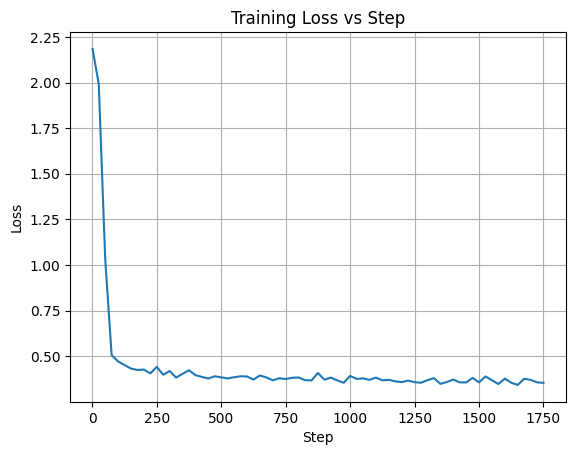

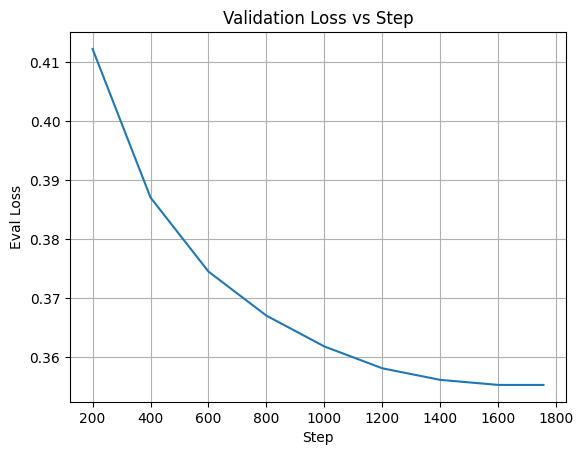

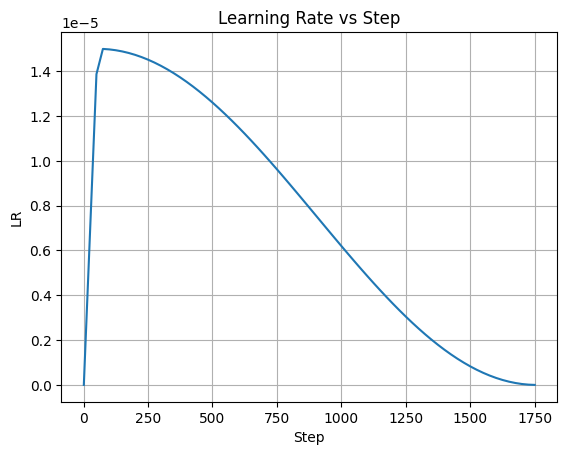

In [ ]:
# Cell 7 — Visualize training & eval curves
import pandas as pd
import matplotlib.pyplot as plt

logs = getattr(trainer.state, "log_history", [])
if not logs:
    print("No log history found on trainer.state.log_history.")
else:
    df = pd.DataFrame(logs)
    keep = [c for c in ["step", "loss", "eval_loss", "learning_rate"] if c in df.columns]
    df = df[keep].dropna(how="all")
    display(df.tail(12))

    # Training loss
    if "loss" in df.columns:
        plt.figure()
        plt.plot(df.dropna(subset=["loss"])["step"], df.dropna(subset=["loss"])["loss"])
        plt.title("Training Loss vs Step"); plt.xlabel("Step"); plt.ylabel("Loss"); plt.grid(True); plt.show()

    # Eval loss
    if "eval_loss" in df.columns:
        plt.figure()
        plt.plot(df.dropna(subset=["eval_loss"])["step"], df.dropna(subset=["eval_loss"])["eval_loss"])
        plt.title("Validation Loss vs Step"); plt.xlabel("Step"); plt.ylabel("Eval Loss"); plt.grid(True); plt.show()

    # Learning rate
    if "learning_rate" in df.columns:
        plt.figure()
        plt.plot(df.dropna(subset=["learning_rate"])["step"], df.dropna(subset=["learning_rate"])["learning_rate"])
        plt.title("Learning Rate vs Step"); plt.xlabel("Step"); plt.ylabel("LR"); plt.grid(True); plt.show()


In [ ]:
model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

# Push to Hugging Face Hub (your token + repo)
model.push_to_hub("<REDACTED>", token="<REDACTED>")
tokenizer.push_to_hub("<REDACTED>", token="<REDACTED>")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...adapter_model.safetensors:   0%|          |  615kB /  671MB            

Saved model to https://huggingface.co/thtskaran/aasha


README.md: 0.00B [00:00, ?B/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...mpghef7viv/tokenizer.json: 100%|##########| 17.2MB / 17.2MB            

**THIS PART OF NOTEBOOK IS TO LOAD THE BASE MODEL , SAVED LORA CONFIG FROM YOUR HF ACCOUNT , MERGES THEM BOTH AND THEN YOU CAN SAVE A QUANTIZED .GGUF FOR EASIER INFERENCE LATER USING OLLAMA.**

In [ ]:
#@title Setup: Python versions and libraries
# If Colab already has a GPU runtime, great. CPU is fine for merging too.
!nvidia-smi || true

# We pin a recent Transformers that supports Gemma 3.
# If you face issues, you can try the special branch noted in the comments:
# !pip install "git+https://github.com/huggingface/transformers@v4.49.0-Gemma-3"
!pip -q install --upgrade pip
!pip -q install "transformers>=4.53.0" peft>=0.13.0 accelerate>=0.33.0 safetensors>=0.4.5 huggingface_hub>=0.25.0

Sat Nov 15 20:01:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   33C    P0             60W /  400W |    8927MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:

#@title Login to Hugging Face
from huggingface_hub import login
import os

HF_TOKEN = os.environ.get("HF_TOKEN", "")  # Optionally set in Colab secrets
if not HF_TOKEN:
    #@markdown Enter your Hugging Face token (with write access to your repo)
    HF_TOKEN = input("Enter your HF token (must have read access to Gemma 3 & write to your repo): ").strip()

login(token=HF_TOKEN)
print("Logged into Hugging Face.")

In [ ]:
#@title Configuration
# Base Gemma 3 4B model (choose 'google/gemma-3-4b' or '-it' as needed)
BASE_MODEL = "meta-llama/Meta-Llama-3-8B-Instruct"
LORA_REPO = "<REDACTED>"  #@param {type:"string"}
# Where to push GGUF. We'll push back to the same repo by default.
PUSH_REPO = "<REDACTED>"  #@param {type:"string"}

# Output local working directories
MERGED_DIR = "merged_model"
GGUF_DIR = "gguf_out"
GGUF_OUTFILE = "gemma3-4b-merged.gguf"
GGUF_QUANTIZED_OUTFILE = "quant.gguf"
QUANTIZATION = "Q4_K_M"  #@param ["Q4_K_M","Q4_0","Q5_K_M","Q8_0"]

# Save tokenizer + special files with the merged model
SAVE_TOKENIZER = True

print("Config loaded.")

Config loaded.


In [ ]:
#@title Clear GPU Memory First
import gc
import torch

# Delete any existing model variables
try:
    del base_model
    del lora_model
    del merged
    del tokenizer
except:
    pass

# Run garbage collection
gc.collect()

# Clear PyTorch CUDA cache
torch.cuda.empty_cache()

# Verify memory is cleared
print(f"GPU memory allocated: {torch.cuda.memory_allocated(0) / 1024**3:.2f} GB")
print(f"GPU memory reserved: {torch.cuda.memory_reserved(0) / 1024**3:.2f} GB")


GPU memory allocated: 7.26 GB
GPU memory reserved: 8.02 GB


In [ ]:
#@title Download base model & LoRA, then merge
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
import torch, os, shutil

dtype = torch.float16
device_map = "auto"

# Store your token (better to use Colab secrets)
HF_TOKEN = "<REDACTED>"

print(f"Loading base model: {BASE_MODEL}")
base_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    torch_dtype=dtype,
    device_map=device_map,
    trust_remote_code=True,
    token=HF_TOKEN  # Add token here
)

print(f"Loading LoRA from: {LORA_REPO}")
lora_model = PeftModel.from_pretrained(
    base_model,
    LORA_REPO,
    is_trainable=False,
    token=HF_TOKEN  # Already added
)

print("Merging LoRA into base (this unloads adapter into model weights)...")
merged = lora_model.merge_and_unload()

# Add token to tokenizer loading too
tokenizer = AutoTokenizer.from_pretrained(
    BASE_MODEL,
    use_fast=True,
    trust_remote_code=True,
    token=HF_TOKEN  # Add token here as well
)

# Save merged model
if os.path.exists(MERGED_DIR):
    shutil.rmtree(MERGED_DIR)
os.makedirs(MERGED_DIR, exist_ok=True)

print(f"Saving merged model to {MERGED_DIR} ...")
merged.save_pretrained(MERGED_DIR, safe_serialization=True)
if SAVE_TOKENIZER:
    tokenizer.save_pretrained(MERGED_DIR)

print("Merged model saved.")


Loading base model: meta-llama/Meta-Llama-3-8B-Instruct


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Loading LoRA from: thtskaran/aasha


adapter_config.json: 0.00B [00:00, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/671M [00:00<?, ?B/s]

Merging LoRA into base (this unloads adapter into model weights)...


tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Saving merged model to merged_model ...
Merged model saved.


In [ ]:
#@title Convert merged HF model → GGUF using llama.cpp
import os, subprocess, sys

REPO_DIR = "llama.cpp"
if not os.path.exists(REPO_DIR):
    !git clone -q https://github.com/ggml-org/llama.cpp.git
else:
    %cd llama.cpp
    !git pull -q
    %cd ..

# Install Python requirements for conversion
!pip -q install -r llama.cpp/requirements.txt

cmd = [
    sys.executable, "llama.cpp/convert_hf_to_gguf.py",
    MERGED_DIR,
    "--outfile", os.path.join(GGUF_DIR, GGUF_OUTFILE),
]

os.makedirs(GGUF_DIR, exist_ok=True)
print("Converting HF → GGUF ...\n", " ".join(cmd))
res = subprocess.run(cmd, capture_output=True, text=True)
print(res.stdout)
if res.returncode != 0:
    print(res.stderr)
    raise RuntimeError("HF→GGUF conversion failed. See logs above.")
print("Conversion completed.")


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.24.0 requires torch==2.9.0, but you have torch 2.6.0+cpu which is incompatible.
xformers 0.0.33.post1 requires torch==2.9.0, but you have torch 2.6.0+cpu which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
o

BELOW YOU CAN FACE A COMMON PROBLEM THA LLAMA CPP HAS SOME BINARIES NON-COMPILED , SO WE TRY TO COMPILE "QUANTIZE" MANUALLY

In [ ]:
#@title Quantize to 4-bit (or selected) GGUF
import os, subprocess, sys

# --- Build the quantizer (preferred: root target -> build/bin/llama-quantize)
%cd llama.cpp
!cmake -S . -B build -DGGML_NATIVE=ON -DCMAKE_BUILD_TYPE=Release >/dev/null
!cmake --build build --target llama-quantize -j >/dev/null
%cd ..

src = os.path.join(GGUF_DIR, GGUF_OUTFILE)
dst = os.path.join(GGUF_DIR, GGUF_QUANTIZED_OUTFILE)

# Primary expected location after building the target above
candidates = [
    "llama.cpp/build/bin/llama-quantize",   # current upstream name
    "llama.cpp/build/bin/quantize",         # legacy name (older checkouts)
]

# If not found (rare), build quantize just from tools/quantize as a fallback
if not any(os.path.exists(p) for p in candidates):
    %cd llama.cpp
    !cmake -S tools/quantize -B tools/quantize/build -DGGML_NATIVE=ON -DCMAKE_BUILD_TYPE=Release >/dev/null
    !cmake --build tools/quantize/build -j >/dev/null
    %cd ..
    # common fallback output names/paths:
    candidates += [
        "llama.cpp/tools/quantize/build/llama-quantize",
        "llama.cpp/tools/quantize/build/quantize",
        "llama.cpp/tools/quantize/llama-quantize",
        "llama.cpp/tools/quantize/quantize",
    ]

quant_bin = next((p for p in candidates if os.path.exists(p) and os.access(p, os.X_OK)), None)
if not quant_bin:
    # helpful diagnostics
    raise FileNotFoundError(f"Could not find a quantizer. Checked: {candidates}")

cmd = [quant_bin, src, dst, QUANTIZATION]
print("Quantizing ...\n", " ".join(cmd))
res = subprocess.run(cmd, capture_output=True, text=True)
print(res.stdout)
if res.returncode != 0:
    print(res.stderr)
    raise RuntimeError("Quantization failed.")
print("Quantized to:", dst)


/content/llama.cpp
CMAKE_BUILD_TYPE=Release
/content
Quantizing ...
 llama.cpp/build/bin/llama-quantize gguf_out/gemma3-4b-merged.gguf gguf_out/quant.gguf Q4_K_M

main: quantize time = 178102.96 ms
main:    total time = 178102.96 ms

Quantized to: gguf_out/quant.gguf


In [ ]:
#@title Push GGUF file back to the same HF repo (rename keeps quant details + author)
from huggingface_hub import HfApi, create_repo, whoami, upload_file
import os, re
from datetime import datetime

# Initialize HfApi with your token
HF_TOKEN = "<REDACTED>"
api = HfApi(token=HF_TOKEN)

# Verify authentication
user = whoami(token=HF_TOKEN)
print("Authed as:", user.get("name") or user.get("id"))

# Ensure repo exists (your LoRA repo)
create_repo(PUSH_REPO, exist_ok=True, repo_type="model", token=HF_TOKEN)

# Locate the current quantized file (e.g., gemma3-4b-merged.Q4_K_M.gguf)
old_path = os.path.join(GGUF_DIR, GGUF_QUANTIZED_OUTFILE)
old_base = os.path.basename(old_path)

# Extract quant details between the last '.' and '.gguf', fallback to 'Q4'
m = re.search(r"\.([A-Za-z0-9_]+)\.gguf$", old_base)
quant_details = m.group(1) if m else "Q4"

new_filename = f"aasha{quant_details}.gguf"
new_path = os.path.join(GGUF_DIR, new_filename)

# Rename locally
if old_path != new_path:
    os.rename(old_path, new_path)
print(f"Renamed {old_base} -> {new_filename}")

# Upload under gguf/ folder
path_in_repo = f"gguf/{new_filename}"
print(f"Uploading {new_filename} → {PUSH_REPO}:{path_in_repo}")

api.upload_file(
    path_or_fileobj=new_path,
    path_in_repo=path_in_repo,
    repo_id=PUSH_REPO,
    repo_type="model",
    commit_message=(
        f"Add {new_filename} (quant {quant_details}) by @thtskaran on "
        f"{datetime.utcnow().isoformat()}Z"
    ),

)

print("Upload complete.")


Authed as: thtskaran
Renamed quant.gguf -> aashaQ4.gguf
Uploading aashaQ4.gguf → thtskaran/aasha:gguf/aashaQ4.gguf


/tmp/ipython-input-1959578106.py:44: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f"{datetime.utcnow().isoformat()}Z"


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  gguf_out/aashaQ4.gguf       :   1%|          | 42.0MB / 4.92GB            

Upload complete.
